In [200]:
from osgeo import ogr

In [201]:
r = ogr.Geometry(ogr.wkbLinearRing)
r.AddPoint(1,1)
r.AddPoint(5,1)
r.AddPoint(5,5)
r.AddPoint(1,5)
r.AddPoint(1,1)
poly = ogr.Geometry(ogr.wkbPolygon)
poly.AddGeometry(r)
print(poly.ExportToWkt())

POLYGON ((1 1 0,5 1 0,5 5 0,1 5 0,1 1 0))


In [202]:
geojson = """{"type":"Polygon","coordinates":[[[1,1],[5,1],[5,5],[1,5],[1,1]]]}"""
polygon = ogr.CreateGeometryFromJson(geojson)
print(polygon)

POLYGON ((1 1,5 1,5 5,1 5,1 1))


In [203]:
# 1 create area

print("The area of our polygon is %d" %polygon.Area())

The area of our polygon is 16


In [204]:
# 2 calculate centroid of polygon

cen = polygon.Centroid()
print(cen)

POINT (3 3)


In [205]:
# 3 Get the boundary

b = polygon.GetBoundary()
print(b)

LINESTRING (1 1,5 1,5 5,1 5,1 1)


In [206]:
# 4 convex bull does the same in this case as boundary, as our polygon is square:

ch = polygon.ConvexHull()
print(ch)

POLYGON ((1 1,1 5,5 5,5 1,1 1))


In [207]:
# 5 buffer. A buffer value of 0 (zero) returns the same values as boundary and convex hull in this example:

buffer = polygon.Buffer(0)
print(buffer)

POLYGON ((1 1,1 5,5 5,5 1,1 1))


In [208]:
#6 check if a point is inside our polygon

point = ogr.Geometry(ogr.wkbPoint)
point.AddPoint(10,10)
polygon.Contains(point)

False

In [209]:
import osgeo.ogr, osgeo.osr

In [210]:
#1 set the spatial reference

spatialReference = osgeo.osr.SpatialReference()
spatialReference.ImportFromProj4('+proj=longlat +ells=WGS84+datum=WGS +no_defs')

#2 create a new shapefile
driver = osgeo.ogr.GetDriverByName('ESRI Shapefile')
shapeData = driver.CreateDataSource('my_polygon.shp')

#3 create the layer
layer = shapeData.CreateLayer('polygon_layer',spatialReference, osgeo.ogr.wkbPolygon)
layerDefinition = layer.GetLayerDefn()

#4 geometry is put inside feature
featureIndex = 0
feature = osgeo.ogr.Feature(layerDefinition)
feature.SetGeometry(polygon)
feature.SetFID(featureIndex)

#5 feature is put into layer
layer.CreateFeature(feature)

#6 check if the file has been created correctly
!ogrinfo my_polygon.shp

INFO: Open of `my_polygon.shp'
      using driver `ESRI Shapefile' successful.
1: my_polygon (Polygon)


In [211]:
# import modules
from osgeo import ogr
import os

#reference the shapefile and specify driver type
shapefile = r"Data/10m_cultural/ne_10m_populated_places.shp"
driver = ogr.GetDriverByName("ESRI Shapefile")

#open the data source with driver, zero means open in read-only mode
dataSource = driver.Open(shapefile, 0)

#use the GetLayer() function for referencing the layer that holds the data
layer = dataSource.GetLayer()

#pass in the coordinates for the data frame to the SetSpatialFilterRect() function. This filter creates a rectangular extent and selects the features inside the extent

layer.SetSpatialFilterRect(-102, 26, -94, 36) 
for feature in layer:
    # select only the cities inside of the USA
    # we can do this through a SQL query:
    # we skip the cities inside of the USA,
    # and print the names of the cities that are
    if feature.GetField("ADM0NAME") != "United States of America":
             continue
    else:
            print(feature.GetField("NAME"))

Ardmore
McAlester
Bryan
San Marcos
Longview
McAllen
Harlingen
Alice
New Braunfels
Cleburne
Brownwood
Big Spring
Vernon
Childress
Texas City
Pasadena
Baytown
Arlington
Texarkana
Fort Smith
Lawton
Norman
Muskogee
Shawnee
Conroe
Nacogdoches
Eagle Pass
Edinburg
Kingsville
Huntsville
Killeen
Lufkin
Del Rio
San Angelo
Sherman
Beaumont
Bay City
Port Lavaca
Falfurrias
Beeville
Dumas
Denton
Temple
Galveston
Freeport
Victoria
Wichita Falls
Waco
Lubbock
Abilene
Tyler
Ft.  Worth
Corpus Christi
Austin
Amarillo
Laredo
Oklahoma City
San Antonio
Dallas
Houston


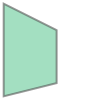

In [212]:
from shapely.geometry import Polygon
p1 = Polygon(((1, 2), (5, 3), (5, 7), (1, 9), (1, 2)))
p2 = Polygon(((6,6), (7,6), (10,4), (11,8), (6,6)))
p1

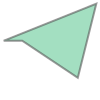

In [213]:
# A new command line is required for printing the second polygon:
p2

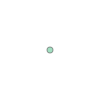

In [214]:
# Point takes tuples as well as positional coordinate values

from shapely.geometry import Point
point = Point(2.0, 2.0)
q = Point((2.0, 2.0))
q

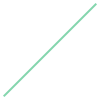

In [215]:
# line geometry

from shapely.geometry import LineString
line = LineString([(0, 0), (10,10)])
line

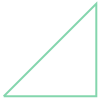

In [216]:
# linear rings

from shapely.geometry.polygon import LinearRing
ring = LinearRing([(0,0), (3,3), (3,0)])
ring

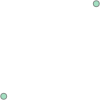

In [217]:
# collection of points

from shapely.geometry import MultiPoint
points = MultiPoint([(0.0, 0.0), (3.0, 3.0)])
points

In [218]:
# collection of lines

from shapely.geometry import MultiLineString
coords = [((0, 0), (1, 1)), ((-1, 0), (1, 0))]
coords

[((0, 0), (1, 1)), ((-1, 0), (1, 0))]

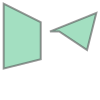

In [219]:
# collection of polygons

from shapely.geometry import MultiPolygon
polygons = MultiPolygon([p1, p2,])
polygons

In [220]:
print(p1.area)
print(p1.bounds)
print(p1.length)
print(p1.geom_type)

22.0
(1.0, 2.0, 5.0, 9.0)
19.59524158061724
Polygon


In [221]:
import json
from shapely.geometry import mapping, shape
p = shape(json.loads('{"type": "Polygon", "coordinates":[[[1,1], [1,3 ], [3,3]]]}'))
print(json.dumps(mapping(p)))
p.area

{"type": "Polygon", "coordinates": [[[1.0, 1.0], [1.0, 3.0], [3.0, 3.0], [1.0, 1.0]]]}


2.0

In [222]:
import fiona
c = fiona.open(r"Data/110m_cultural/ne_110m_admin_1_states_provinces.shp")
rec = next(iter(c))
rec.keys()

dict_keys(['type', 'id', 'properties', 'geometry'])

In [223]:
import pprint
pprint.pprint(rec['type'])
pprint.pprint(rec['id'])
pprint.pprint(rec['properties'])
pprint.pprint(rec['geometry'])

'Feature'
'0'
OrderedDict([('featurecla', 'Admin-1 scale rank'),
             ('scalerank', 2),
             ('adm1_code', 'USA-3514'),
             ('diss_me', 3514),
             ('iso_3166_2', 'US-MN'),
             ('wikipedia', 'http://en.wikipedia.org/wiki/Minnesota'),
             ('iso_a2', 'US'),
             ('adm0_sr', 1),
             ('name', 'Minnesota'),
             ('name_alt', 'MN|Minn.'),
             ('name_local', None),
             ('type', 'State'),
             ('type_en', 'State'),
             ('code_local', 'US27'),
             ('code_hasc', 'US.MN'),
             ('note', None),
             ('hasc_maybe', None),
             ('region', 'Midwest'),
             ('region_cod', None),
             ('provnum_ne', 0),
             ('gadm_level', 1),
             ('check_me', 20),
             ('datarank', 1),
             ('abbrev', 'Minn.'),
             ('postal', 'MN'),
             ('area_sqkm', 0),
             ('sameascity', -99),
             ('labelran

In [224]:
print(len(c)) # prints total amount of features
print(c.driver) # prints driver name
print(c.crs) # prints coordinate reference system of data file

51
ESRI Shapefile
{'init': 'epsg:4326'}


In [225]:
import pprint, fiona
with fiona.open\
(r"Data/110m_cultural/ne_110m_admin_1_states_provinces.shp") as src:
    pprint.pprint(src[0])

{'geometry': {'coordinates': [[(-89.95765601272012, 47.286907253603175),
                               (-90.13175391311144, 47.29274669045216),
                               (-90.30585181350276, 47.29801768654593),
                               (-90.47994971389409, 47.30385712339489),
                               (-90.6540476142854, 47.309128119488676),
                               (-90.85778194859611, 47.21282908791278),
                               (-91.06097368036777, 47.117046820659795),
                               (-91.26470801467849, 47.02126455340681),
                               (-91.46844234898919, 46.9249655218309),
                               (-91.59225908076053, 46.876260484395914),
                               (-91.71661841507091, 46.82760712339301),
                               (-91.8409777493813, 46.778385321635),
                               (-91.96479448115262, 46.72970612241605),
                               (-92.01189754918667, 46.7117227239

In [226]:
from shapely.geometry import shape
minnesota = {'type': 'Polygon', 'coordinates':
[[(-89.95765601272012, 47.286907253603175),
                               (-90.13175391311144, 47.29274669045216),
                               (-90.30585181350276, 47.29801768654593),
                               (-90.47994971389409, 47.30385712339489),
                               (-90.6540476142854, 47.309128119488676),
                               (-90.85778194859611, 47.21282908791278),
                               (-91.06097368036777, 47.117046820659795),
                               (-91.26470801467849, 47.02126455340681),
                               (-91.46844234898919, 46.9249655218309),
                               (-91.59225908076053, 46.876260484395914),
                               (-91.71661841507091, 46.82760712339301),
                               (-91.8409777493813, 46.778385321635),
                               (-91.96479448115262, 46.72970612241605),
                               (-92.01189754918667, 46.71172272397848),
                               (-92.27487891312, 46.65614472104858),
                               (-92.26482784703924, 46.09522288673644),
                               (-92.2965830146826, 46.09628225359842),
                               (-92.54369971390233, 45.98569468849381),
                               (-92.75696834997089, 45.88991242124082),
                               (-92.89982784704182, 45.705763454768714),
                               (-92.68922054723626, 45.51843638771068),
                               (-92.76541744665064, 45.26708222104298),
                               (-92.76647681351261, 44.9961426865367),
                               (-92.79665584997105, 44.77602692318949),
                               (-92.50507158076417, 44.58391978614445),
                               (-92.38549231644078, 44.57492808692567),
                               (-92.06215287959051, 44.43258535417769),
                               (-91.949989183301, 44.364837551443046),
                               (-91.87960588251947, 44.25742808692439),
                               (-91.62770911331273, 44.085448920257036),
                               (-91.28959021682704, 43.93729258887629),
                               (-91.25729244664458, 43.854739488289965),
                               (-91.2546569485977, 43.61397899024206),
                               (-91.22819861526426, 43.5012468531974),
                               (-92.54000484899348, 43.51977285417405),
                               (-94.00102678096546, 43.51341665300214),
                               (-95.35993608272871, 43.50018748633542),
                               (-96.4526600817565, 43.50178945573647),
                               (-96.43943091508982, 44.43576345476367),
                               (-96.56061214881424, 45.39301768653837),
                               (-96.73576941606754, 45.47081655535372),
                               (-96.83470394569034, 45.62532908790642),
                               (-96.78072791216147, 45.76079885515958),
                               (-96.55689144568922, 45.87244578712617),
                               (-96.53945064979075, 46.017966620460186),
                               (-96.53890804725165, 46.199480088885366),
                               (-96.60135901567638, 46.3513571233911),
                               (-96.68548824744755, 46.51328522397769),
                               (-96.73365068234358, 46.71647695574927),
                               (-96.7458204821483, 46.9445250514533),
                               (-96.77969438351563, 46.999043687521294),
                               (-96.82041541216165, 47.29220408791309),
                               (-96.82465287960957, 47.42661448830425),
                               (-96.84423824744819, 47.54619375262766),
                               (-96.89397681352912, 47.74886872007637),
                               (-97.01515804725355, 47.954205023788134),
                               (-97.13104244666809, 48.13729462339825),
                               (-97.14850908078273, 48.31878225360731),
                               (-97.16122148312654, 48.51458425556122),
                               (-97.12734758175921, 48.64212169045756),
                               (-97.1204746162644, 48.75852285419501),
                               (-97.21413814979343, 48.90244171812793),
                               (-97.22894344764504, 49.00088532164389),
                               (-95.15883724646483, 48.9998259547819),
                               (-95.15620174841791, 49.38401439065592),
                               (-94.81754024939323, 49.38928538674975),
                               (-94.64026424841592, 48.84001658791925),
                               (-94.32912044958647, 48.670672919298795),
                               (-93.63061011429733, 48.60928131773602),
                               (-92.60984554723586, 48.45001455341253),
                               (-91.63987891311746, 48.13993012144516),
                               (-90.83026424840062, 48.27010305438836),
                               (-89.59995174839577, 48.01027395282483),
                               (-89.59940914585667, 48.01027395282483),
                               (-89.4900319346622, 48.01340602289096),
                               (-89.52269548211933, 47.96053538674391),
                               (-89.61369767938538, 47.81925202085796),
                               (-89.72800594761503, 47.641976019880644),
                               (-89.84283098016755, 47.464725857119504),
                               (-89.95765601272012, 47.286907253603175)]]}

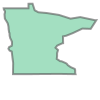

In [227]:
geom = shape(minnesota)
geom

In [228]:
import geopandas as gpd
%matplotlib inline
df = gpd.read_file\
(r"Data/110m_cultural/ne_110m_admin_1_states_provinces.shp")
df

,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name,name_alt,...,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,FCLASS_TLC,geometry
0,Admin-1 scale rank,2,USA-3514,3514,US-MN,http://en.wikipedia.org/wiki/Minnesota,US,1,Minnesota,MN|Minn.,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-89.95766 47.28691, -90.13175 47.292..."
1,Admin-1 scale rank,2,USA-3515,3515,US-MT,http://en.wikipedia.org/wiki/Montana,US,1,Montana,MT|Mont.,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-116.04823 49.00037, -113.05950 49.0..."
2,Admin-1 scale rank,2,USA-3516,3516,US-ND,http://en.wikipedia.org/wiki/North_Dakota,US,1,North Dakota,ND|N.D.,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-97.22894 49.00089, -97.21414 48.902..."
3,Admin-1 scale rank,2,USA-3517,3517,US-HI,http://en.wikipedia.org/wiki/Hawaii,US,8,Hawaii,HI|Hawaii,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-155.93665 19.05939, -155.9080..."
4,Admin-1 scale rank,2,USA-3518,3518,US-ID,http://en.wikipedia.org/wiki/Idaho,US,1,Idaho,ID|Idaho,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-116.04823 49.00037, -115.96780 47.9..."
5,Admin-1 scale rank,2,USA-3519,3519,US-WA,http://en.wikipedia.org/wiki/Washington_(state),US,6,Washington,WA|Wash.,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-117.03143 48.99931, -117.02665 47.7..."
6,Admin-1 scale rank,2,USA-3520,3520,US-AZ,http://en.wikipedia.org/wiki/Arizona,US,1,Arizona,AZ|Ariz.,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-109.04522 36.99991, -109.04367 31.3..."
7,Admin-1 scale rank,2,USA-3521,3521,US-CA,http://en.wikipedia.org/wiki/California,US,8,California,CA|Calif.,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-114.64222 35.05311, -114.62212 34.9..."
8,Admin-1 scale rank,2,USA-3522,3522,US-CO,http://en.wikipedia.org/wiki/Colorado,US,1,Colorado,CO|Colo.,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-102.05017 40.00081, -102.04012 38.4..."
9,Admin-1 scale rank,2,USA-3523,3523,US-NV,http://en.wikipedia.org/wiki/Nevada,US,1,Nevada,NV|Nev.,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-117.02825 42.00002, -114.03422 41.9..."


In [229]:
type(df)

geopandas.geodataframe.GeoDataFrame

In [230]:
df.shape

(51, 122)

In [231]:
df.columns

Index(['featurecla', 'scalerank', 'adm1_code', 'diss_me', 'iso_3166_2',
       'wikipedia', 'iso_a2', 'adm0_sr', 'name', 'name_alt',
       ...
       'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT', 'FCLASS_NL',
       'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'FCLASS_TLC', 'geometry'],
      dtype='object', length=122)

In [232]:
df.loc[0]

featurecla                                   Admin-1 scale rank
scalerank                                                     2
adm1_code                                              USA-3514
diss_me                                                    3514
iso_3166_2                                                US-MN
                                    ...                        
FCLASS_SE                                                  None
FCLASS_BD                                                  None
FCLASS_UA                                                  None
FCLASS_TLC                                                 None
geometry      POLYGON ((-89.95765601272012 47.28690725360318...
Name: 0, Length: 122, dtype: object

In [233]:
df['name']

0                Minnesota
1                  Montana
2             North Dakota
3                   Hawaii
4                    Idaho
5               Washington
6                  Arizona
7               California
8                 Colorado
9                   Nevada
10              New Mexico
11                  Oregon
12                    Utah
13                 Wyoming
14                Arkansas
15                    Iowa
16                  Kansas
17                Missouri
18                Nebraska
19                Oklahoma
20            South Dakota
21               Louisiana
22                   Texas
23             Connecticut
24           Massachusetts
25           New Hampshire
26            Rhode Island
27                 Vermont
28                 Alabama
29                 Florida
30                 Georgia
31             Mississippi
32          South Carolina
33                Illinois
34                 Indiana
35                Kentucky
36          North Carolina
3

In [234]:
california = df.loc[df['name'] == "California"]
california

,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name,name_alt,...,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,FCLASS_TLC,geometry
7,Admin-1 scale rank,2,USA-3521,3521,US-CA,http://en.wikipedia.org/wiki/California,US,8,California,CA|Calif.,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-114.64222 35.05311, -114.62212 34.9..."


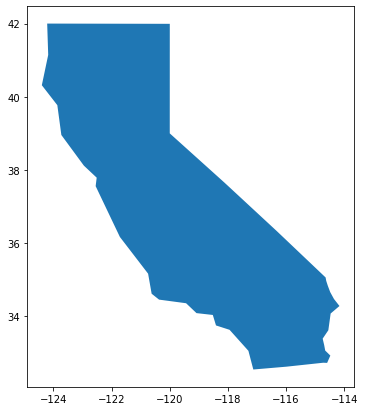

In [235]:
california.plot(figsize=(7,7))

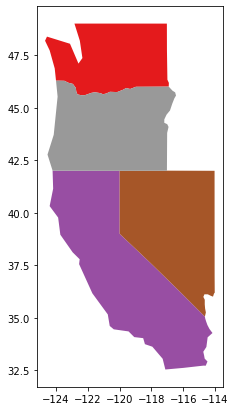

In [236]:
multipl = df.iloc[[5,7,9,11]]
multipl.plot(cmap="Set1", figsize=(7,7))

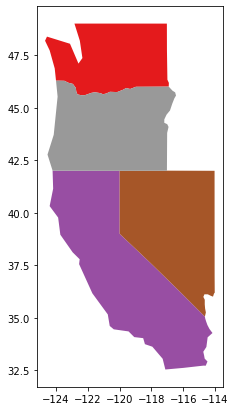

In [237]:
exp = df.cx[-124:-118,30:50]
exp.plot(cmap="Set1", figsize=(7,7))

In [238]:
import geopandas

In [239]:
states = geopandas.read_file(r"Data/110m_cultural/ne_110m_admin_1_states_provinces.shp")

In [240]:
states

,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name,name_alt,...,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,FCLASS_TLC,geometry
0,Admin-1 scale rank,2,USA-3514,3514,US-MN,http://en.wikipedia.org/wiki/Minnesota,US,1,Minnesota,MN|Minn.,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-89.95766 47.28691, -90.13175 47.292..."
1,Admin-1 scale rank,2,USA-3515,3515,US-MT,http://en.wikipedia.org/wiki/Montana,US,1,Montana,MT|Mont.,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-116.04823 49.00037, -113.05950 49.0..."
2,Admin-1 scale rank,2,USA-3516,3516,US-ND,http://en.wikipedia.org/wiki/North_Dakota,US,1,North Dakota,ND|N.D.,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-97.22894 49.00089, -97.21414 48.902..."
3,Admin-1 scale rank,2,USA-3517,3517,US-HI,http://en.wikipedia.org/wiki/Hawaii,US,8,Hawaii,HI|Hawaii,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-155.93665 19.05939, -155.9080..."
4,Admin-1 scale rank,2,USA-3518,3518,US-ID,http://en.wikipedia.org/wiki/Idaho,US,1,Idaho,ID|Idaho,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-116.04823 49.00037, -115.96780 47.9..."
5,Admin-1 scale rank,2,USA-3519,3519,US-WA,http://en.wikipedia.org/wiki/Washington_(state),US,6,Washington,WA|Wash.,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-117.03143 48.99931, -117.02665 47.7..."
6,Admin-1 scale rank,2,USA-3520,3520,US-AZ,http://en.wikipedia.org/wiki/Arizona,US,1,Arizona,AZ|Ariz.,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-109.04522 36.99991, -109.04367 31.3..."
7,Admin-1 scale rank,2,USA-3521,3521,US-CA,http://en.wikipedia.org/wiki/California,US,8,California,CA|Calif.,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-114.64222 35.05311, -114.62212 34.9..."
8,Admin-1 scale rank,2,USA-3522,3522,US-CO,http://en.wikipedia.org/wiki/Colorado,US,1,Colorado,CO|Colo.,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-102.05017 40.00081, -102.04012 38.4..."
9,Admin-1 scale rank,2,USA-3523,3523,US-NV,http://en.wikipedia.org/wiki/Nevada,US,1,Nevada,NV|Nev.,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-117.02825 42.00002, -114.03422 41.9..."


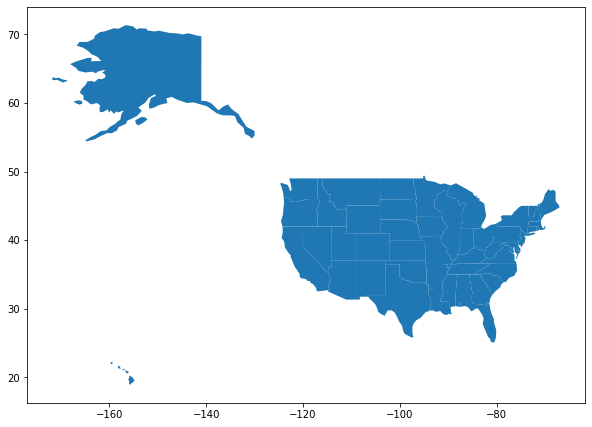

In [241]:
%matplotlib inline
states.plot(figsize=(10,10))

In [242]:
fires = geopandas.read_file(r"Data/mtbs_FODpoints_DD/mtbs_FODpoints_DD.shp")
fires

,Event_ID,irwinID,Incid_Name,Incid_Type,Map_ID,Map_Prog,Asmnt_Type,BurnBndAc,BurnBndLat,BurnBndLon,...,dNBR_offst,dNBR_stdDv,NoData_T,IncGreen_T,Low_T,Mod_T,High_T,Comment,ORIG_FID,geometry
0,AK6448214467319840607,None,GLACIER CREEK,Wildfire,4534,MTBS,Initial (SS),1897,64.482,-144.673,...,-9999,-9999,9999,9999,550,165,-20,None,0,POINT (-144.67325 64.48231)
1,SD4308410285019840906,None,SANDOZ,Wildfire,4535,MTBS,Initial,2691,43.084,-102.850,...,211,-9999,-970,-150,220,700,9999,None,1,POINT (-102.84988 43.08393)
2,MT4880411345819840819,None,NAPI PEAK,Wildfire,4536,MTBS,Extended,3680,48.804,-113.458,...,-62,-9999,-970,-150,160,308,515,None,2,POINT (-113.45772 48.80434)
3,MT4533610695819840826,None,KIRBY,Wildfire,4537,MTBS,Extended,1597,45.336,-106.958,...,52,-9999,-970,-150,150,309,525,None,3,POINT (-106.95829 45.33640)
4,MT4561710632319840918,None,LAKE CREEK,Wildfire,4538,MTBS,Initial,3617,45.617,-106.323,...,-104,-9999,-970,-150,-50,175,9999,None,4,POINT (-106.32284 45.61684)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30413,AL3403308569720210307,4AEFD78F-C2BE-470C-AB5F-1B0918A84A23,MT WIESNER,Wildfire,10024251,MTBS,Extended,1905,34.019,-85.687,...,16,16,-970,-150,20,9999,9999,None,30413,POINT (-85.68731 34.01841)
30414,FL2862308067720200715,A7B0E005-54EE-4827-A962-59495C4B0623,FMU 5.1 C AND D,Prescribed Fire,10024252,MTBS,Initial,914,28.641,-80.69,...,18,15,-970,-150,55,9999,9999,None,30414,POINT (-80.68930 28.64502)
30415,SC3450308143420210307,None,UNNAMED,Prescribed Fire,10024253,MTBS,Initial,645,34.504,-81.435,...,-5,13,-970,-150,20,9999,9999,None,30415,POINT (-81.43491 34.50382)
30416,AZ3415810972420210707,F1B3DE00-D58E-40FF-AF91-CE3C84389F80,FIREBOX,Wildfire,10024338,MTBS,Extended,1075,34.157,-109.732,...,11,29,-970,-150,50,313,600,None,30416,POINT (-109.73103 34.15523)


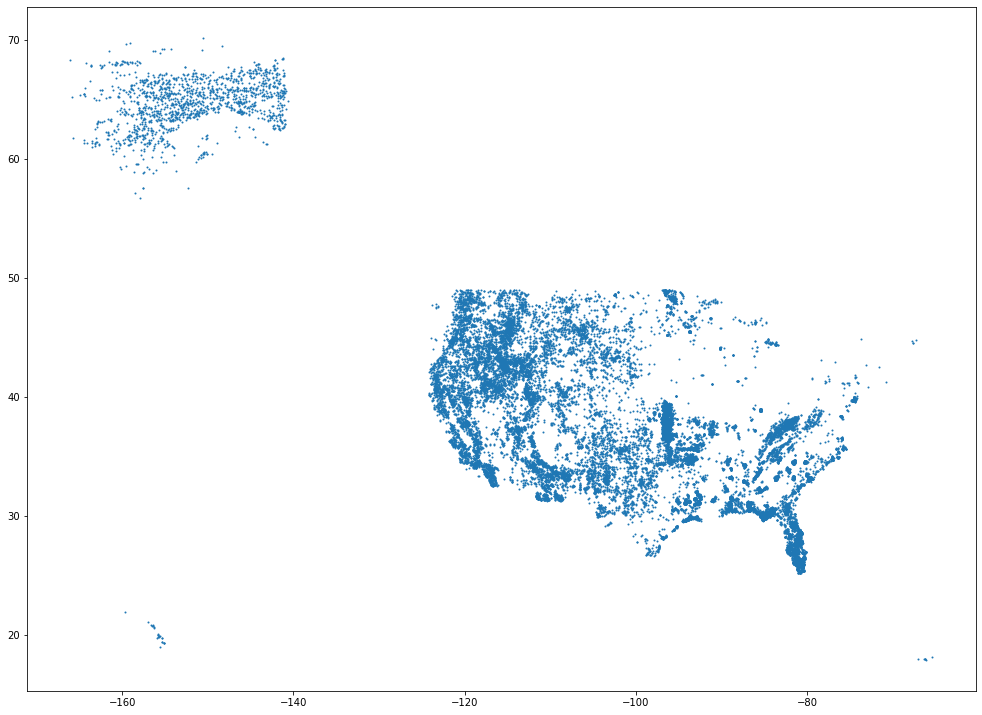

In [243]:
fires.plot(markersize=1, figsize=(17,17))


In [244]:
fires.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [245]:
states.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [246]:
fires = fires.to_crs("epsg:4326")

In [247]:
state_fires = geopandas.sjoin(fires,states[['name','geometry']].copy(),op='within')
state_fires

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3242: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


,Event_ID,irwinID,Incid_Name,Incid_Type,Map_ID,Map_Prog,Asmnt_Type,BurnBndAc,BurnBndLat,BurnBndLon,...,NoData_T,IncGreen_T,Low_T,Mod_T,High_T,Comment,ORIG_FID,geometry,index_right,name
0,AK6448214467319840607,None,GLACIER CREEK,Wildfire,4534,MTBS,Initial (SS),1897,64.482,-144.673,...,9999,9999,550,165,-20,None,0,POINT (-144.67325 64.48231),50,Alaska
11,AK6393015752719840606,None,MUD FIRE,Wildfire,4545,MTBS,Extended (SS),10243,63.930,-157.527,...,9999,9999,475,335,225,Hard to determine fire perimeter,11,POINT (-157.52685 63.92986),50,Alaska
12,AK6375715753719840609,None,WAPOO FIRE,Wildfire,4546,MTBS,Extended (SS),37083,63.757,-157.537,...,9999,9999,450,300,200,None,12,POINT (-157.53652 63.75710),50,Alaska
13,AK6535415457219840611,None,414008,Wildfire,4547,MTBS,Extended (SS),3169,65.354,-154.572,...,9999,9999,500,260,-9999,Perimeter difficult to delineate.,13,POINT (-154.57250 65.35357),50,Alaska
14,AK6640915520219840617,None,HUS NW 30,Wildfire,4548,MTBS,Extended (SS),1990,66.409,-155.202,...,9999,9999,490,140,325,None,14,POINT (-155.20182 66.40871),50,Alaska
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16992,OH3869908322420090424,None,UNNAMED,Wildfire,18381,MTBS,Initial,3259,38.699,-83.224,...,-970,-150,70,299,560,None,16992,POINT (-83.22436 38.69879),37,Ohio
28175,OH3861408255620190322,DB43038A-5584-4163-B1D1-E7A6F878F79B,CY19 BLUEGRASS PRESCRIBED BURN,Prescribed Fire,10017178,MTBS,Initial,1190,38.617,-82.542,...,-970,-150,20,215,9999,"Revised 06/02/2021 - adjusted thresholds, remo...",28175,POINT (-82.54279 38.61839),37,Ohio
29456,OH3948808216720210324,4BA45C3A-34FE-44E4-976F-B5D1FAF86CAB,LONG RIDGE RX UNIT 1-12,Prescribed Fire,10021862,MTBS,Initial,1037,39.487,-82.181,...,-970,-150,75,9999,9999,None,29456,POINT (-82.17959 39.48788),37,Ohio
11907,MA4250107165620050416,None,THE RANGE,Wildfire,14408,MTBS,Initial,760,42.501,-71.656,...,-970,-150,150,9999,9999,None,11907,POINT (-71.64979 42.49544),24,Massachusetts


In [248]:
counts_per_state = state_fires.groupby('name').size()
counts_per_state.sort_values(axis=0, ascending=False)

name
Florida           5507
Kansas            1982
California        1979
Idaho             1587
Texas             1503
Alaska            1377
Arizona           1279
Oklahoma          1112
Oregon            1071
New Mexico        1039
Nevada            1036
Mississippi        909
Montana            878
Alabama            833
South Carolina     815
Louisiana          746
Utah               715
Arkansas           700
Georgia            634
Washington         590
Minnesota          521
Wyoming            449
Colorado           403
Kentucky           367
Missouri           315
West Virginia      311
North Carolina     303
South Dakota       243
Tennessee          210
Virginia           158
Nebraska           129
New Jersey         114
North Dakota       114
Michigan            82
Indiana             65
Wisconsin           53
Illinois            45
Maryland            40
Hawaii              22
Pennsylvania        18
Iowa                13
New York            11
Maine                4
Ohio  

In [249]:
states = states.merge(counts_per_state.reset_index(name='number_of_fires'))
states.head()

,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name,name_alt,...,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,FCLASS_TLC,geometry,number_of_fires
0,Admin-1 scale rank,2,USA-3514,3514,US-MN,http://en.wikipedia.org/wiki/Minnesota,US,1,Minnesota,MN|Minn.,...,None,None,None,None,None,None,None,None,"POLYGON ((-89.95766 47.28691, -90.13175 47.292...",521
1,Admin-1 scale rank,2,USA-3515,3515,US-MT,http://en.wikipedia.org/wiki/Montana,US,1,Montana,MT|Mont.,...,None,None,None,None,None,None,None,None,"POLYGON ((-116.04823 49.00037, -113.05950 49.0...",878
2,Admin-1 scale rank,2,USA-3516,3516,US-ND,http://en.wikipedia.org/wiki/North_Dakota,US,1,North Dakota,ND|N.D.,...,None,None,None,None,None,None,None,None,"POLYGON ((-97.22894 49.00089, -97.21414 48.902...",114
3,Admin-1 scale rank,2,USA-3517,3517,US-HI,http://en.wikipedia.org/wiki/Hawaii,US,8,Hawaii,HI|Hawaii,...,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-155.93665 19.05939, -155.9080...",22
4,Admin-1 scale rank,2,USA-3518,3518,US-ID,http://en.wikipedia.org/wiki/Idaho,US,1,Idaho,ID|Idaho,...,None,None,None,None,None,None,None,None,"POLYGON ((-116.04823 49.00037, -115.96780 47.9...",1587


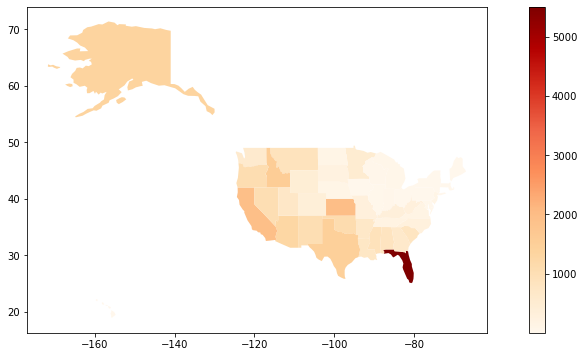

In [250]:
ax = states.plot(column='number_of_fires', figsize=(15, 6),
cmap='OrRd', legend=True)

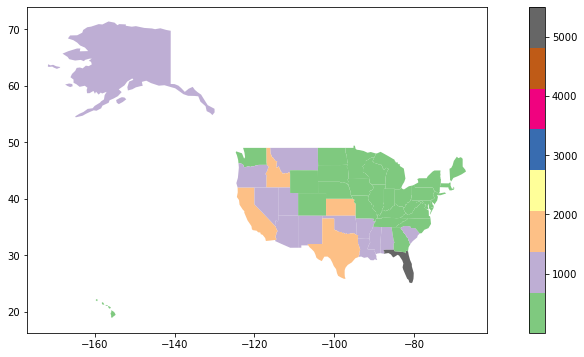

In [251]:
ax = states.plot(column='number_of_fires', figsize=(15, 6),
cmap='Accent', legend=True)

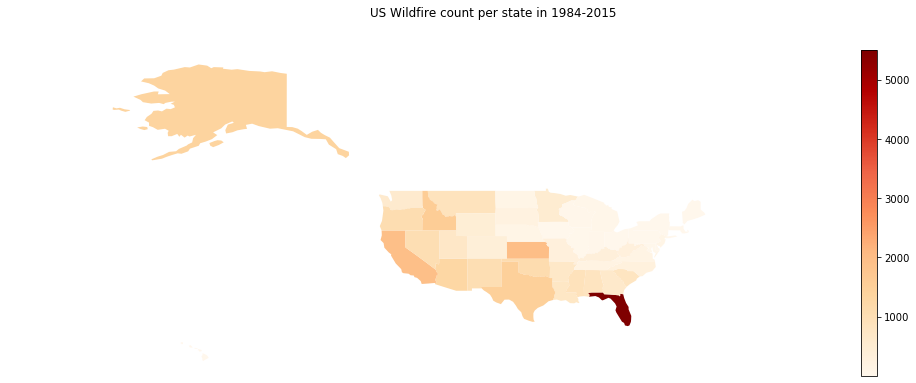

In [252]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(1, figsize=(18,6))
ax = states.plot(column='number_of_fires', cmap='OrRd',
legend=True, ax=ax)
lims = plt.axis('equal')
f.suptitle('US Wildfire count per state in 1984-2015')
ax.set_axis_off()
plt.show()

In [253]:
len(fires.index)

30418

In [254]:
counts_per_state.sum()

30291

In [255]:
fires.empty #checks if there are empty fields in the dataframe

False

In [256]:
fires['geometry'].empty

False

## Your Section Here

In [257]:
import geopandas as gpd

In [258]:
states_1985_1999 = geopandas.read_file(r"Data/110m_cultural/ne_110m_admin_1_states_provinces.shp")

In [259]:
states_2000_2014 = geopandas.read_file(r"Data/110m_cultural/ne_110m_admin_1_states_provinces.shp")

In [260]:
wildfire_2000_2014 = gpd.read_file("Data/wildfires_2000-2014/wildfires_2000-2014.shp")
wildfire_1985_1999 = gpd.read_file("Data/wildfires_1985-1999/wildfires_1985-1999.shp")

In [261]:
wildfire_2000_2014

,Event_ID,irwinID,Incid_Name,Incid_Type,Map_ID,Map_Prog,Asmnt_Type,BurnBndAc,BurnBndLat,BurnBndLon,...,dNBR_offst,dNBR_stdDv,NoData_T,IncGreen_T,Low_T,Mod_T,High_T,Comment,ORIG_FID,geometry
0,AK6294916290120001227,None,PASTOLIAK RIVER,Wildfire,11509,MTBS,Initial (SS),12003,62.949,-162.901,...,-9999,-9999,9999,9999,200,100,-40,None,6330,POINT (-3614747.999 5671782.010)
1,AK6376715207620000623,None,FORAKER,Wildfire,11626,MTBS,Extended,18065,63.767,-152.076,...,-24,-9999,-970,-150,25,271,540,Edited shapefile of the AK fire histort perimeter,6331,POINT (-3062979.558 5351596.941)
2,AK6383315580420000625,None,TANGO CREEK,Wildfire,11014,MTBS,Extended,31347,63.833,-155.804,...,47,-9999,-970,-150,120,312,550,Edited AK fire history shapefile,6332,POINT (-3238946.623 5482656.169)
3,AK6383815072620000625,None,UPPER OTTER CREEK,Wildfire,11628,MTBS,Extended,4863,63.838,-150.726,...,-32,-9999,-970,-150,30,265,525,Edited shapefile of AK fire history perimeters,6333,POINT (-2994954.287 5316093.627)
4,AK6387215071520000624,None,OTTER CREEK,Wildfire,11627,MTBS,Extended,12071,63.872,-150.715,...,-32,-9999,-970,-150,30,273,540,Edited shapefile of AK fire history perimeter,6334,POINT (-2992677.783 5318507.336)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14382,WA4876712026320140805,DE8CF884-B2AC-42B1-8F15-2D31F021E07B,UPPER FALLS,Wildfire,22531,MTBS,Extended,8846,48.753,-120.252,...,-3,-9999,-970,-150,70,218,410,None,20712,POINT (-1784197.607 3090146.675)
14383,WI4661309124720140523,None,UNNAMED,Prescribed Fire,22460,MTBS,Initial (SS),2116,46.61,-91.235,...,-9999,-9999,9999,9999,300,-9999,-9999,None,20713,POINT (366130.408 2633604.819)
14384,WV3795208025920140508,None,UNNAMED,Unknown,21453,MTBS,Initial (SS),1069,37.956,-80.262,...,-9999,-9999,9999,9999,187,-89,-191,None,20714,POINT (1364076.672 1771034.108)
14385,WY4433410679520141108,6D08482F-03FA-47D9-8A5D-0A6FDA97AABE,WEST RANGE FIRE,Wildfire,22721,MTBS,Initial,1377,44.342,-106.8,...,41,-9999,-970,-150,50,195,380,None,20715,POINT (-856845.184 2421126.815)


In [262]:
wildfire_1985_1999

,Event_ID,irwinID,Incid_Name,Incid_Type,Map_ID,Map_Prog,Asmnt_Type,BurnBndAc,BurnBndLat,BurnBndLon,...,dNBR_offst,dNBR_stdDv,NoData_T,IncGreen_T,Low_T,Mod_T,High_T,Comment,ORIG_FID,geometry
0,AK6244915566819850730,None,SELATNA,Wildfire,4773,MTBS,Extended,7382,62.449,-155.668,...,61,-9999,-970,-150,175,440,750,None,197,POINT (-3308976.225 5370152.682)
1,AK6256215664519850720,None,SUGARLOAF,Wildfire,4738,MTBS,Extended,5489,62.562,-156.645,...,3,-9999,-970,-150,70,320,600,None,198,POINT (-3349139.671 5413232.076)
2,AK6260315742119850801,None,CAMELBACK,Wildfire,4737,MTBS,Extended,4780,62.603,-157.421,...,27,-9999,-970,-150,130,334,585,None,199,POINT (-3383487.781 5443901.288)
3,AK6283615543219850803,None,KATLITNA,Wildfire,4770,MTBS,Extended,9522,62.836,-155.432,...,95,-9999,-970,-150,185,438,740,None,200,POINT (-3275752.604 5392309.730)
4,AK6293715788819850728,None,531021,Wildfire,4763,MTBS,Extended,7295,62.937,-157.888,...,-11,-9999,-970,-150,20,275,550,None,201,POINT (-3385947.488 5486211.592)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6128,WY4362011069119990506,None,S.GROSVENT,Prescribed Fire,10865,MTBS,Initial (SS),1665,43.620,-110.691,...,-9999,-9999,9999,9999,70,-9999,-9999,None,6325,POINT (-1175867.225 2383023.832)
6129,WY4362710700019990819,None,OUTLAW,Wildfire,10608,MTBS,Extended,1426,43.627,-107.000,...,26,-9999,-970,-150,60,241,460,None,6326,POINT (-881891.047 2343776.336)
6130,WY4388710883219990315,None,LOWER GRAS,Prescribed Fire,10615,MTBS,Initial,5910,43.887,-108.832,...,185,-9999,-970,-150,105,325,9999,None,6327,POINT (-1024085.737 2390908.951)
6131,WY4389910558419991031,None,CLARKELEN,Wildfire,10609,MTBS,Initial,21432,43.899,-105.584,...,-33,-9999,-970,-150,25,280,9999,None,6328,POINT (-765769.590 2361693.315)


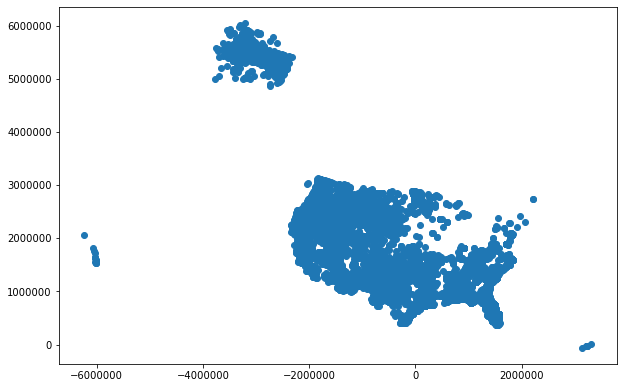

In [263]:
%matplotlib inline
wildfire_2000_2014.plot(figsize=(10,10))

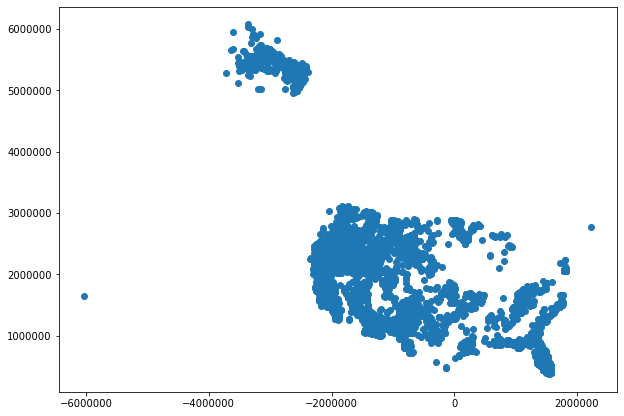

In [264]:
%matplotlib inline
wildfire_1985_1999.plot(figsize=(10,10))

In [265]:
wildfire_1985_1999 = wildfire_1985_1999.to_crs("epsg:4326")

In [266]:
wildfire_2000_2014 = wildfire_2000_2014.to_crs("epsg:4326")

In [267]:
state_wildfires_1985_1999 = geopandas.sjoin(wildfire_1985_1999,states_1985_1999[['name','geometry']].copy(),op='within')
state_wildfires_1985_1999

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3242: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


,Event_ID,irwinID,Incid_Name,Incid_Type,Map_ID,Map_Prog,Asmnt_Type,BurnBndAc,BurnBndLat,BurnBndLon,...,NoData_T,IncGreen_T,Low_T,Mod_T,High_T,Comment,ORIG_FID,geometry,index_right,name
0,AK6244915566819850730,None,SELATNA,Wildfire,4773,MTBS,Extended,7382,62.449,-155.668,...,-970,-150,175,440,750,None,197,POINT (-155.66779 62.44871),50,Alaska
1,AK6256215664519850720,None,SUGARLOAF,Wildfire,4738,MTBS,Extended,5489,62.562,-156.645,...,-970,-150,70,320,600,None,198,POINT (-156.64498 62.56186),50,Alaska
2,AK6260315742119850801,None,CAMELBACK,Wildfire,4737,MTBS,Extended,4780,62.603,-157.421,...,-970,-150,130,334,585,None,199,POINT (-157.42071 62.60300),50,Alaska
3,AK6283615543219850803,None,KATLITNA,Wildfire,4770,MTBS,Extended,9522,62.836,-155.432,...,-970,-150,185,438,740,None,200,POINT (-155.43220 62.83552),50,Alaska
4,AK6293715788819850728,None,531021,Wildfire,4763,MTBS,Extended,7295,62.937,-157.888,...,-970,-150,20,275,550,None,201,POINT (-157.88762 62.93675),50,Alaska
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5867,ND4635010081119990326,None,SOLEN,Wildfire,10360,MTBS,Initial,1155,46.350,-100.811,...,-970,-150,50,9999,9999,None,6064,POINT (-100.81086 46.35006),2,North Dakota
5868,ND4720110169919991101,None,UNNAMED,Wildfire,10832,MTBS,Initial,1062,47.201,-101.699,...,-970,-150,130,9999,9999,None,6065,POINT (-101.69937 47.20136),2,North Dakota
5869,ND4762110385319991031,None,GAP/ROUGH CREEK,Wildfire,10661,MTBS,Initial,53708,47.621,-103.853,...,-970,-150,60,425,9999,None,6066,POINT (-103.85278 47.62147),2,North Dakota
5870,ND4765210316719991031,None,ROUGH CRK,Wildfire,10662,MTBS,Initial,7887,47.652,-103.167,...,-970,-150,85,420,9999,None,6067,POINT (-103.20071 47.66584),2,North Dakota


In [268]:
state_wildfires_2000_2014 = geopandas.sjoin(wildfire_2000_2014,states_2000_2014[['name','geometry']].copy(),op='within')
state_wildfires_2000_2014

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3242: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


,Event_ID,irwinID,Incid_Name,Incid_Type,Map_ID,Map_Prog,Asmnt_Type,BurnBndAc,BurnBndLat,BurnBndLon,...,NoData_T,IncGreen_T,Low_T,Mod_T,High_T,Comment,ORIG_FID,geometry,index_right,name
0,AK6294916290120001227,None,PASTOLIAK RIVER,Wildfire,11509,MTBS,Initial (SS),12003,62.949,-162.901,...,9999,9999,200,100,-40,None,6330,POINT (-162.90062 62.94854),50,Alaska
1,AK6376715207620000623,None,FORAKER,Wildfire,11626,MTBS,Extended,18065,63.767,-152.076,...,-970,-150,25,271,540,Edited shapefile of the AK fire histort perimeter,6331,POINT (-152.04372 63.75551),50,Alaska
2,AK6383315580420000625,None,TANGO CREEK,Wildfire,11014,MTBS,Extended,31347,63.833,-155.804,...,-970,-150,120,312,550,Edited AK fire history shapefile,6332,POINT (-155.83040 63.82607),50,Alaska
3,AK6383815072620000625,None,UPPER OTTER CREEK,Wildfire,11628,MTBS,Extended,4863,63.838,-150.726,...,-970,-150,30,265,525,Edited shapefile of AK fire history perimeters,6333,POINT (-150.72561 63.83769),50,Alaska
4,AK6387215071520000624,None,OTTER CREEK,Wildfire,11627,MTBS,Extended,12071,63.872,-150.715,...,-970,-150,30,273,540,Edited shapefile of AK fire history perimeter,6334,POINT (-150.71532 63.87213),50,Alaska
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13034,IL3761908858120130405,None,UNNAMED,Prescribed Fire,20238,MTBS,Initial (SS),651,37.551,-88.652,...,9999,9999,360,-9999,-9999,Burn visible in reflectance but very faint iin...,19364,POINT (-88.65147 37.55094),33,Illinois
13678,IL3740608933820140326,None,UNNAMED,Prescribed Fire,22521,MTBS,Initial,1627,37.405,-89.334,...,-970,-150,50,280,9999,None,20008,POINT (-89.33540 37.40483),33,Illinois
13679,IL3748108874220140320,None,UNNAMED,Prescribed Fire,22518,MTBS,Initial (SS),578,37.486,-88.742,...,9999,9999,500,-9999,-9999,None,20009,POINT (-88.74304 37.48542),33,Illinois
13680,IL3751508845320140324,None,UNNAMED,Prescribed Fire,22519,MTBS,Initial (SS),1216,37.511,-88.445,...,9999,9999,240,-9999,-9999,None,20010,POINT (-88.44438 37.51074),33,Illinois


In [269]:
counts_per_state_1985_1999 = state_wildfires_1985_1999.groupby('name').size()
counts_per_state_1985_1999.sort_values(axis = 0, ascending=False)

name
Florida           983
California        762
Idaho             525
Nevada            362
New Mexico        352
Arizona           325
Oregon            309
Alaska            280
Utah              245
West Virginia     211
Texas             203
Montana           180
Minnesota         146
Kentucky          130
Washington        114
Kansas            112
Wyoming            97
Colorado           87
Georgia            85
Missouri           81
Oklahoma           76
New Jersey         64
South Dakota       62
Louisiana          56
North Carolina     43
Tennessee          33
Nebraska           32
South Carolina     32
Alabama            29
Mississippi        26
Michigan           21
Virginia           20
North Dakota       19
Arkansas           13
Wisconsin           3
New York            2
Hawaii              1
Maine               1
Indiana             1
dtype: int64

In [270]:
counts_per_state_2000_2014 = state_wildfires_2000_2014.groupby('name').size()
counts_per_state_2000_2014.sort_values(axis = 0, ascending=False)

name
Florida           3274
Texas              841
Kansas             794
California         729
Idaho              700
Oklahoma           606
Alaska             603
Arizona            502
Oregon             472
New Mexico         449
Nevada             438
South Carolina     400
Montana            400
Alabama            396
Mississippi        386
Utah               321
Arkansas           317
Louisiana          313
Georgia            280
Washington         260
Wyoming            246
Minnesota          214
Colorado           197
Kentucky           163
South Dakota       139
Missouri           137
North Carolina     132
Tennessee          130
Virginia            83
West Virginia       79
Nebraska            63
North Dakota        40
New Jersey          37
Maryland            32
Wisconsin           29
Indiana             28
Michigan            26
Hawaii              12
Pennsylvania        10
Iowa                 8
Illinois             7
New York             4
Delaware             2
Ohio  

In [271]:
states_2000_2014= states_2000_2014.merge(counts_per_state_1985_1999.reset_index(name ='number_of_fires'))
states_2000_2014.head()

,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name,name_alt,...,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,FCLASS_TLC,geometry,number_of_fires
0,Admin-1 scale rank,2,USA-3514,3514,US-MN,http://en.wikipedia.org/wiki/Minnesota,US,1,Minnesota,MN|Minn.,...,None,None,None,None,None,None,None,None,"POLYGON ((-89.95766 47.28691, -90.13175 47.292...",146
1,Admin-1 scale rank,2,USA-3515,3515,US-MT,http://en.wikipedia.org/wiki/Montana,US,1,Montana,MT|Mont.,...,None,None,None,None,None,None,None,None,"POLYGON ((-116.04823 49.00037, -113.05950 49.0...",180
2,Admin-1 scale rank,2,USA-3516,3516,US-ND,http://en.wikipedia.org/wiki/North_Dakota,US,1,North Dakota,ND|N.D.,...,None,None,None,None,None,None,None,None,"POLYGON ((-97.22894 49.00089, -97.21414 48.902...",19
3,Admin-1 scale rank,2,USA-3517,3517,US-HI,http://en.wikipedia.org/wiki/Hawaii,US,8,Hawaii,HI|Hawaii,...,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-155.93665 19.05939, -155.9080...",1
4,Admin-1 scale rank,2,USA-3518,3518,US-ID,http://en.wikipedia.org/wiki/Idaho,US,1,Idaho,ID|Idaho,...,None,None,None,None,None,None,None,None,"POLYGON ((-116.04823 49.00037, -115.96780 47.9...",525


In [273]:
states_1985_1999 = states_1985_1999.merge(counts_per_state_2000_2014.reset_index(name='number_of_fires'))
states_1985_1999.head()

,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name,name_alt,...,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,FCLASS_TLC,geometry,number_of_fires
0,Admin-1 scale rank,2,USA-3514,3514,US-MN,http://en.wikipedia.org/wiki/Minnesota,US,1,Minnesota,MN|Minn.,...,None,None,None,None,None,None,None,None,"POLYGON ((-89.95766 47.28691, -90.13175 47.292...",214
1,Admin-1 scale rank,2,USA-3515,3515,US-MT,http://en.wikipedia.org/wiki/Montana,US,1,Montana,MT|Mont.,...,None,None,None,None,None,None,None,None,"POLYGON ((-116.04823 49.00037, -113.05950 49.0...",400
2,Admin-1 scale rank,2,USA-3516,3516,US-ND,http://en.wikipedia.org/wiki/North_Dakota,US,1,North Dakota,ND|N.D.,...,None,None,None,None,None,None,None,None,"POLYGON ((-97.22894 49.00089, -97.21414 48.902...",40
3,Admin-1 scale rank,2,USA-3517,3517,US-HI,http://en.wikipedia.org/wiki/Hawaii,US,8,Hawaii,HI|Hawaii,...,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-155.93665 19.05939, -155.9080...",12
4,Admin-1 scale rank,2,USA-3518,3518,US-ID,http://en.wikipedia.org/wiki/Idaho,US,1,Idaho,ID|Idaho,...,None,None,None,None,None,None,None,None,"POLYGON ((-116.04823 49.00037, -115.96780 47.9...",700


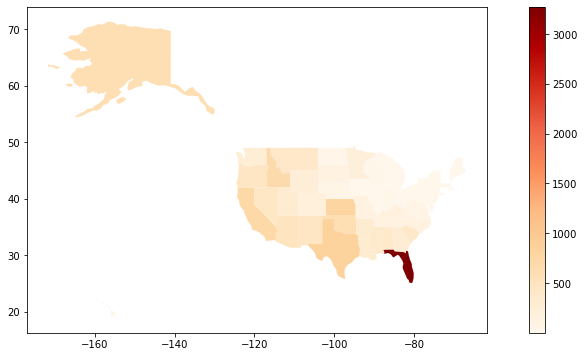

In [274]:
ax = states_1985_1999.plot(column='number_of_fires', figsize=(15, 6),
cmap='OrRd', legend=True)

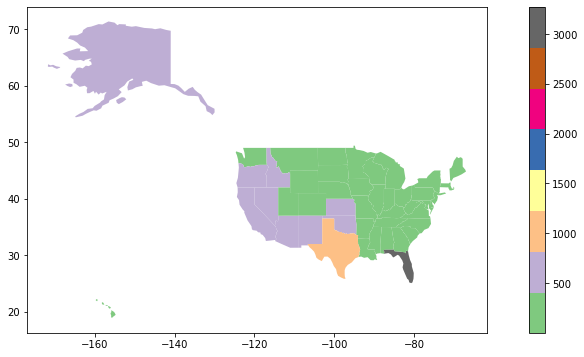

In [275]:
ax = states_1985_1999.plot(column='number_of_fires', figsize=(15, 6),
cmap='Accent', legend=True)

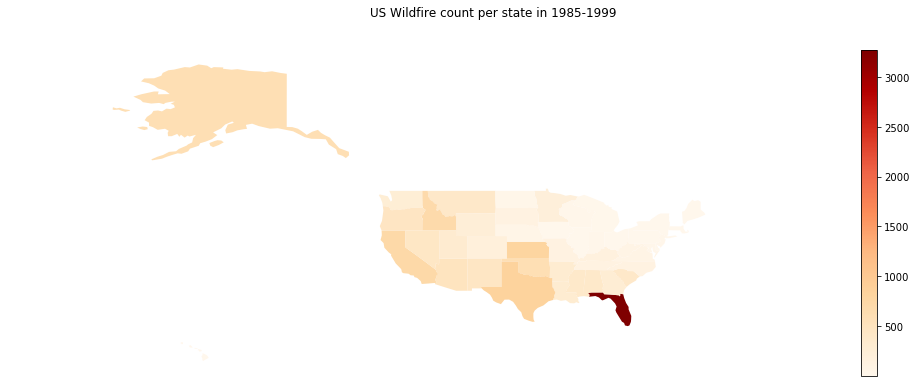

In [276]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(1, figsize=(18,6))
ax = states_1985_1999.plot(column='number_of_fires', cmap='OrRd',
legend=True, ax=ax)
lims = plt.axis('equal')
f.suptitle('US Wildfire count per state in 1985-1999')
ax.set_axis_off()
plt.show()

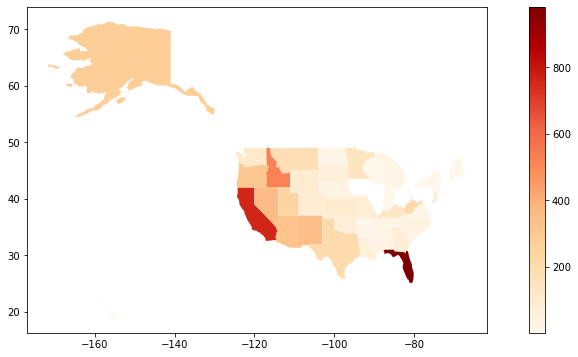

In [277]:
ax = states_2000_2014.plot(column='number_of_fires', figsize=(15, 6),
cmap='OrRd', legend=True)

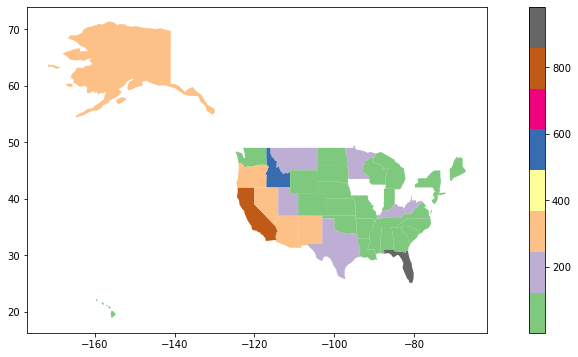

In [278]:
ax = states_2000_2014.plot(column='number_of_fires', figsize=(15, 6),
cmap='Accent', legend=True)

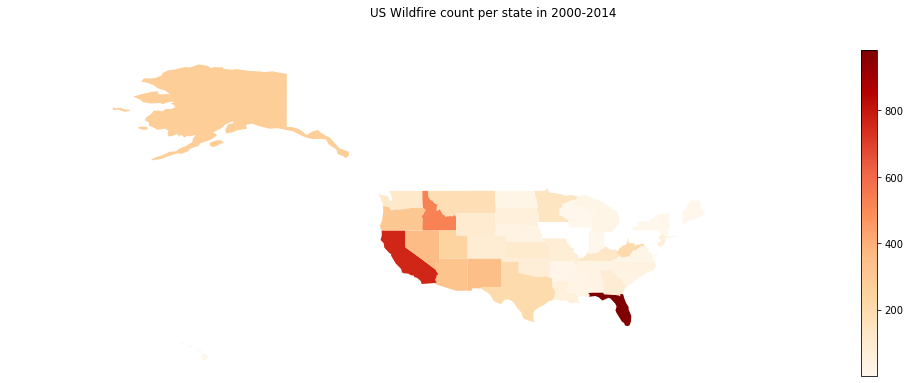

In [279]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(1, figsize=(18,6))
ax = states_2000_2014.plot(column='number_of_fires', cmap='OrRd',
legend=True, ax=ax)
lims = plt.axis('equal')
f.suptitle('US Wildfire count per state in 2000-2014')
ax.set_axis_off()
plt.show()


In this section of code, i delve into a rich exploration of geographic and wildfire data spanning two different time periods1985-1999 and 2000-2014. Initially, I import the geopandas library as gpd, setting the stage for the data manipulation and analysis that follows. My first task is to load the geographical data of states for both time periods using geopandas.read_file. Interestingly, I notice that the files for both periods share the same path, hinting at possibly identical geographical outlines. I then proceed to load the wildfire data for both time periods using gpd.read_file, each stored in distinct shapefiles. Eager to observe the raw wildfire datasets, I execute them, visualizing a snapshot of what I'll be working with. With the data loaded, my focus shifts to visualization. After setting up the inline display for matplotlib plots, I create plots for the wildfire data of each period. The figsize parameter is adjusted to ensure the plots are sufficiently large for a clear view. I then convert the coordinate reference systems of both wildfire datasets to EPSG:4326, ensuring a standardized geographical projection.

The core of my analysis involves associating each wildfire event with the state it occurred in. To achieve this, I employ a spatial join operation using geopandas.sjoin with the operation set to 'within', effectively mapping each wildfire to its respective state. This meticulous process is performed for both time periods, yielding datasets that pair each wildfire event with a state. With the state-wildfire pairing complete, I dig deeper to uncover wildfire trends. I group the data by state and calculate the size of each group, representing the count of wildfires per state. The results are sorted to highlight states with the highest wildfire occurrence, revealing a stark reality of wildfire prevalence. Now, it's time to merge these findings with the original geographical data, enriching the state datasets with wildfire counts. The merge function serves me well, creating new datasets that hold both geographical and wildfire count data. The finale of my analysis is a visual spectacle: a series of choropleth maps portraying wildfire counts per state across both time periods. Each map is meticulously crafted, with color schemes and legends that elucidate the wildfire trends. The matplotlib library enhances my visualization, allowing me to set titles, adjust axes, and fine-tune the appearance of my maps. As I display the maps, the lighter yellowish color means fewer wildfire counts in the US states and the redder the color is in the choropleth map, the more wildfire count in the US states it will be. Based on the visualization, I see that California and Idaho have significant growth in terms of wildfire counts.